___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Tree Types Prediction Project***". 

In this project, you must perform EDA processes for implementing predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library) will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind classification models and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering using SQLite local database. 

At this point, in order to improve your skills of using SQL with Python, you are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of your models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *Evaluate your models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but you can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if you want.*



---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering with sqlite3 Module


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement KNN Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Implement SVM Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred',
              'weight': 'bold', 'size': 14}
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

#### *ii. Load Dataset*

In [2]:
df= pd.read_csv("covtype.csv")

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
df.apply(lambda x: x.nunique())

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [8]:
df.corr()['Cover_Type']

Elevation                            -0.269554
Aspect                                0.017080
Slope                                 0.148285
Horizontal_Distance_To_Hydrology     -0.020317
Vertical_Distance_To_Hydrology        0.081664
Horizontal_Distance_To_Roadways      -0.153450
Hillshade_9am                        -0.035415
Hillshade_Noon                       -0.096426
Hillshade_3pm                        -0.048290
Horizontal_Distance_To_Fire_Points   -0.108936
Wilderness_Area1                     -0.203913
Wilderness_Area2                     -0.048059
Wilderness_Area3                      0.066846
Wilderness_Area4                      0.323200
Soil_Type1                            0.090828
Soil_Type2                            0.118135
Soil_Type3                            0.068064
Soil_Type4                            0.099672
Soil_Type5                            0.077890
Soil_Type6                            0.112958
Soil_Type7                           -0.000496
Soil_Type8   

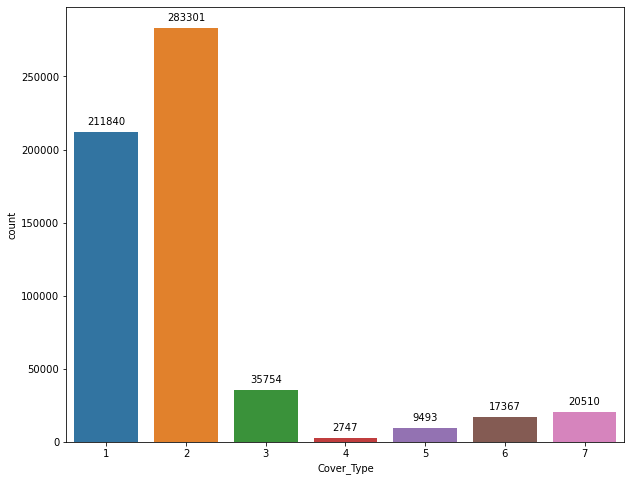

In [9]:
plt.figure(figsize=(10, 8))
vizz=sns.countplot("Cover_Type",data=df)
for p in vizz.patches:
    vizz.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [10]:
df.corr().head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664


In [11]:
df.corr().iloc[:,[0, 2,4]]

,Elevation,Slope,Vertical_Distance_To_Hydrology
Elevation,1.000000,-0.242697,0.093306
Aspect,0.015735,0.078728,0.070305
Slope,-0.242697,1.000000,0.274976
Horizontal_Distance_To_Hydrology,0.306229,-0.010607,0.606236
Vertical_Distance_To_Hydrology,0.093306,0.274976,1.000000
Horizontal_Distance_To_Roadways,0.365559,-0.215914,-0.046372
Hillshade_9am,0.112179,-0.327199,-0.166333
Hillshade_Noon,0.205887,-0.526911,-0.110957
Hillshade_3pm,0.059148,-0.175854,0.034902
Horizontal_Distance_To_Fire_Points,0.148022,-0.185662,-0.069913


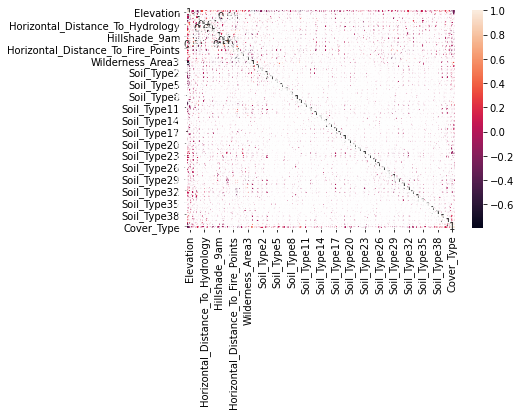

In [12]:
sns.heatmap(df.corr(),annot=True)

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

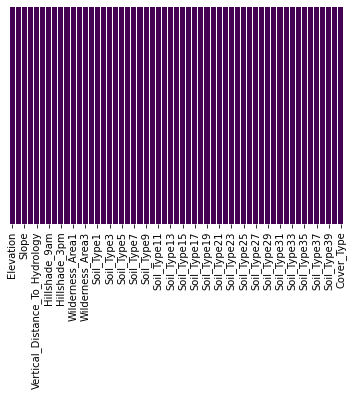

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.isnull().sum()*100/df.shape[0]



Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Type10                       

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

In [7]:
numeric = []
for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [30]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile)

In [31]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

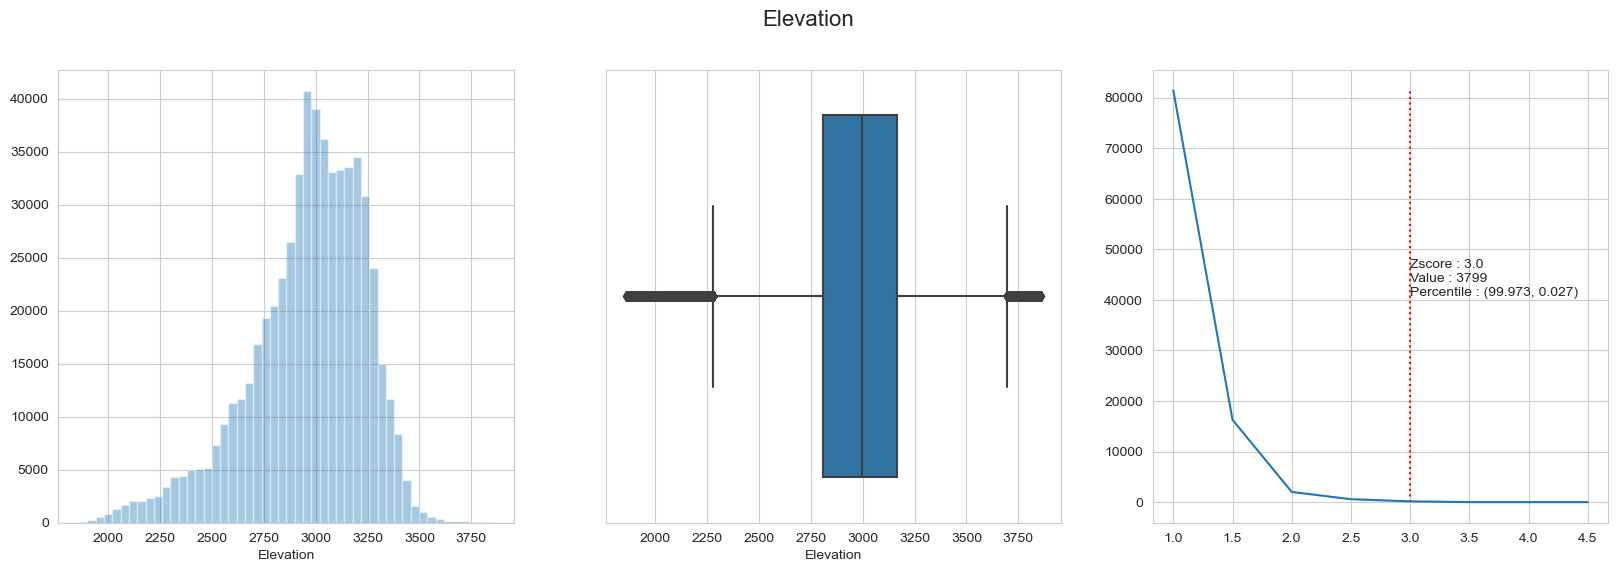

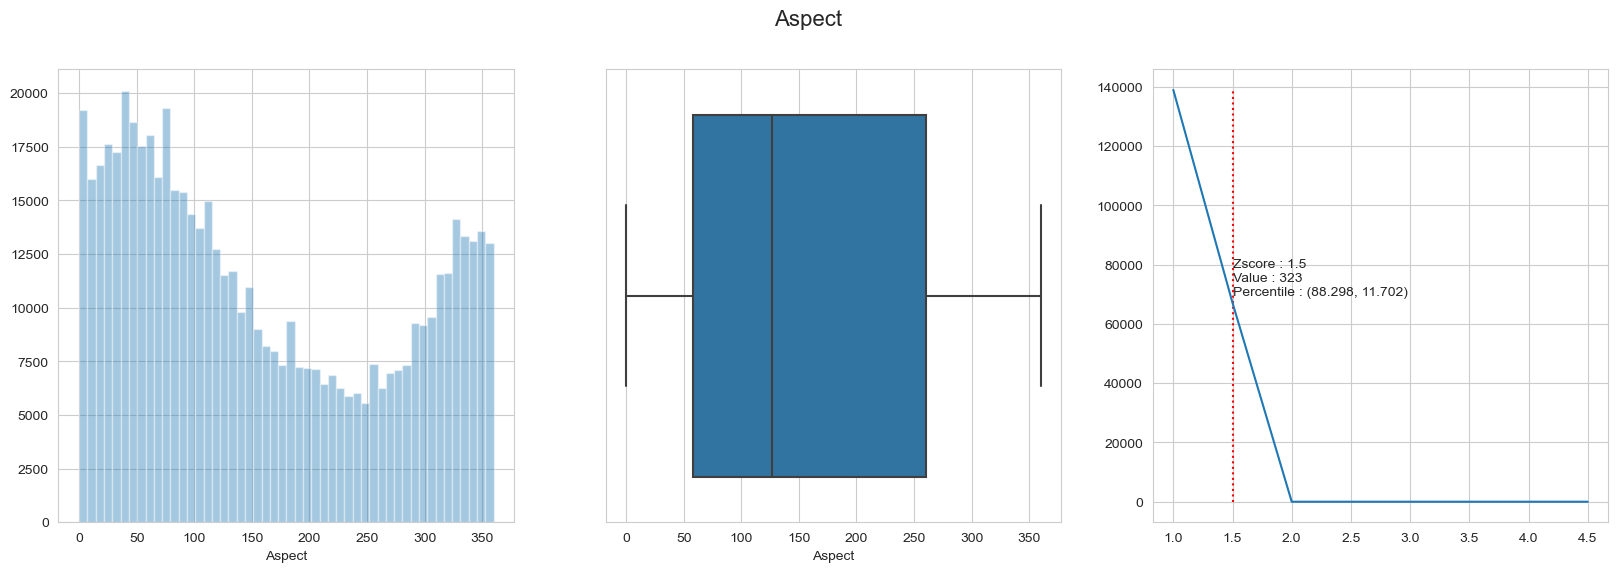

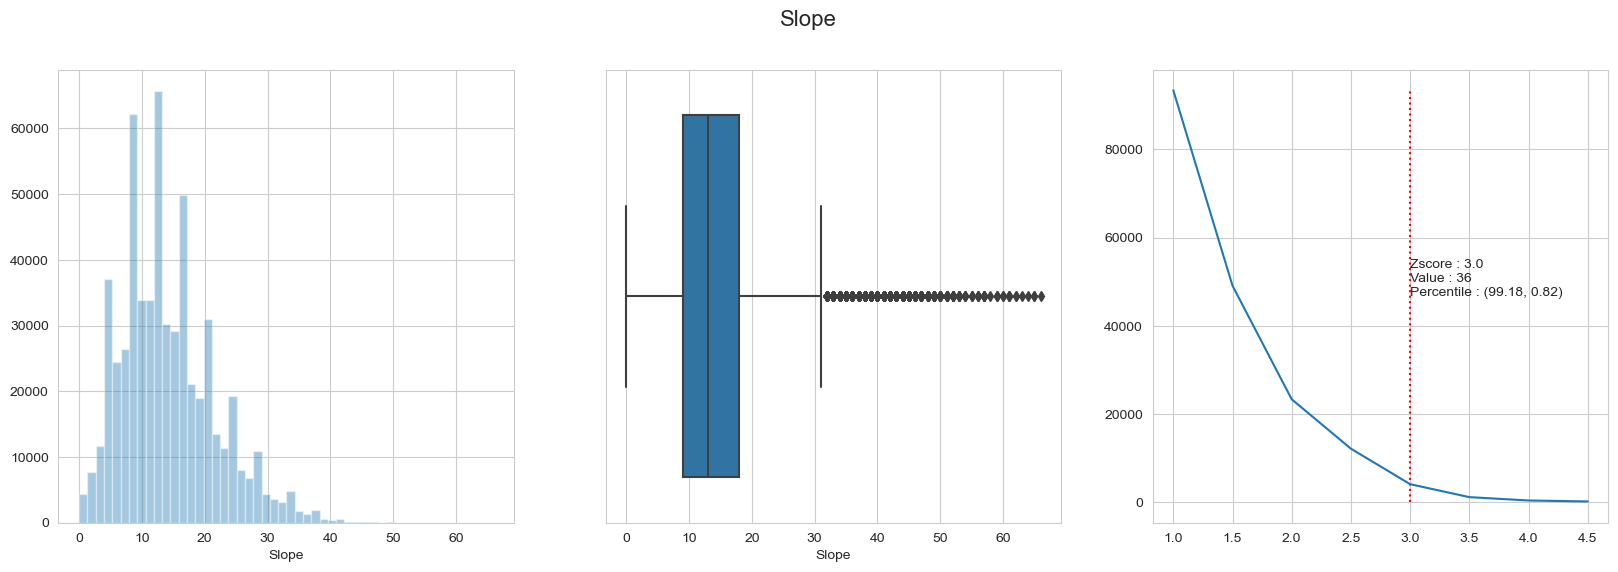

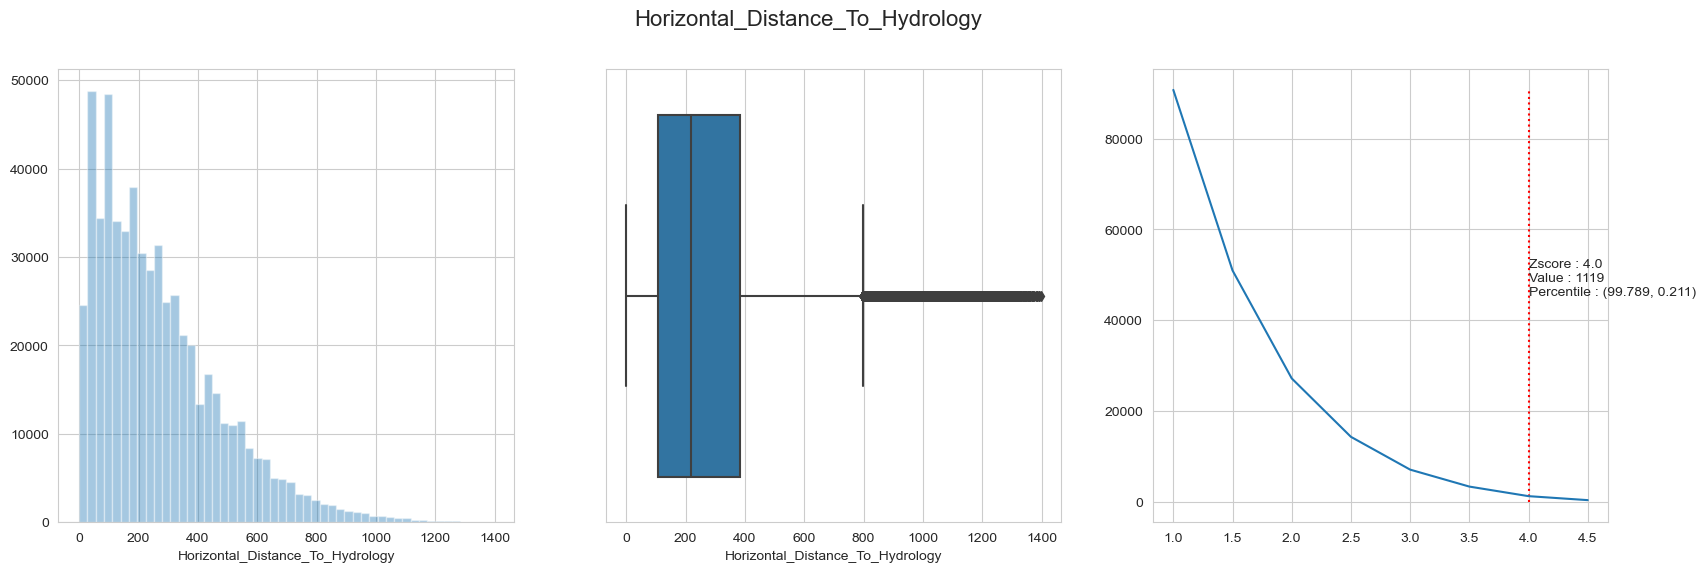

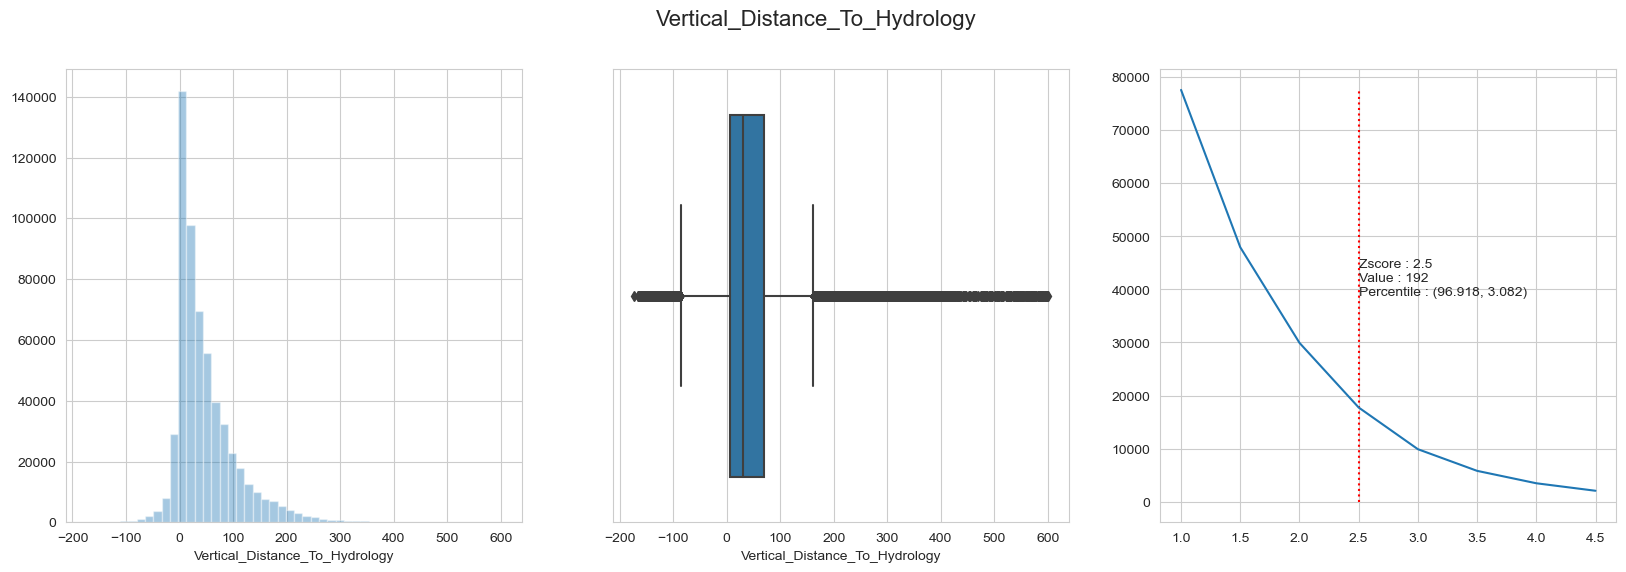

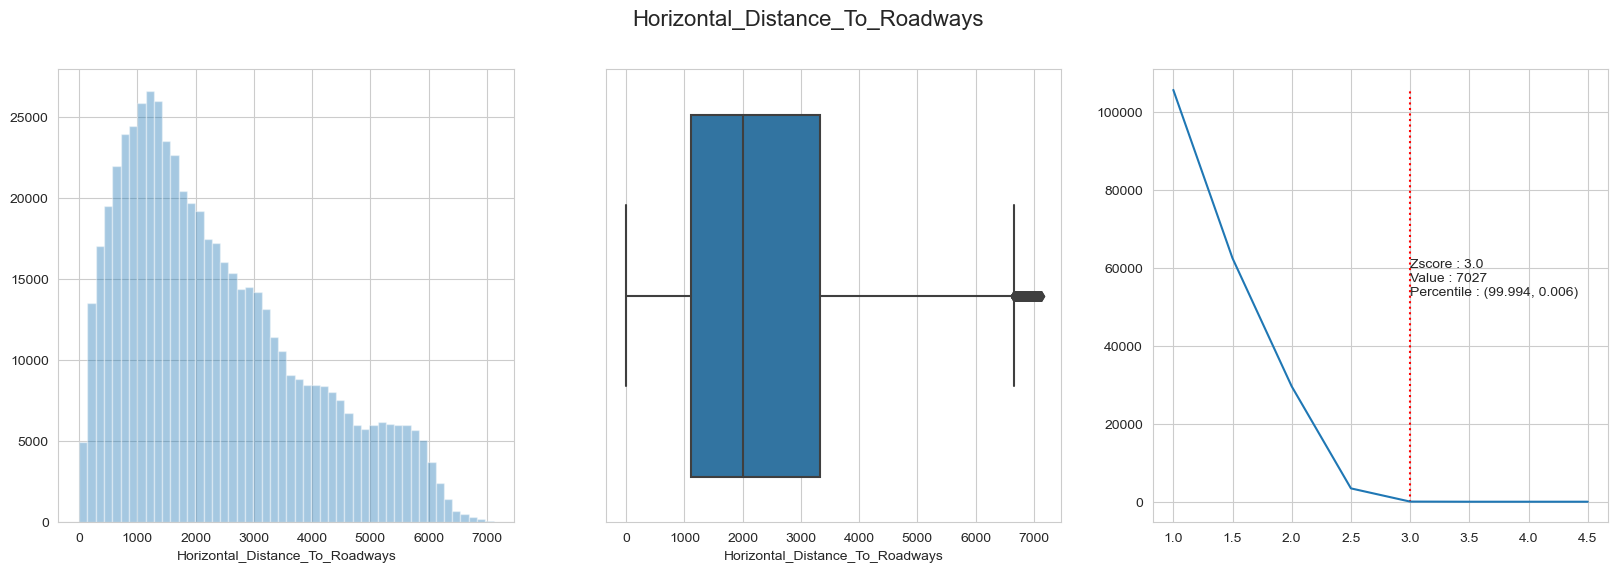

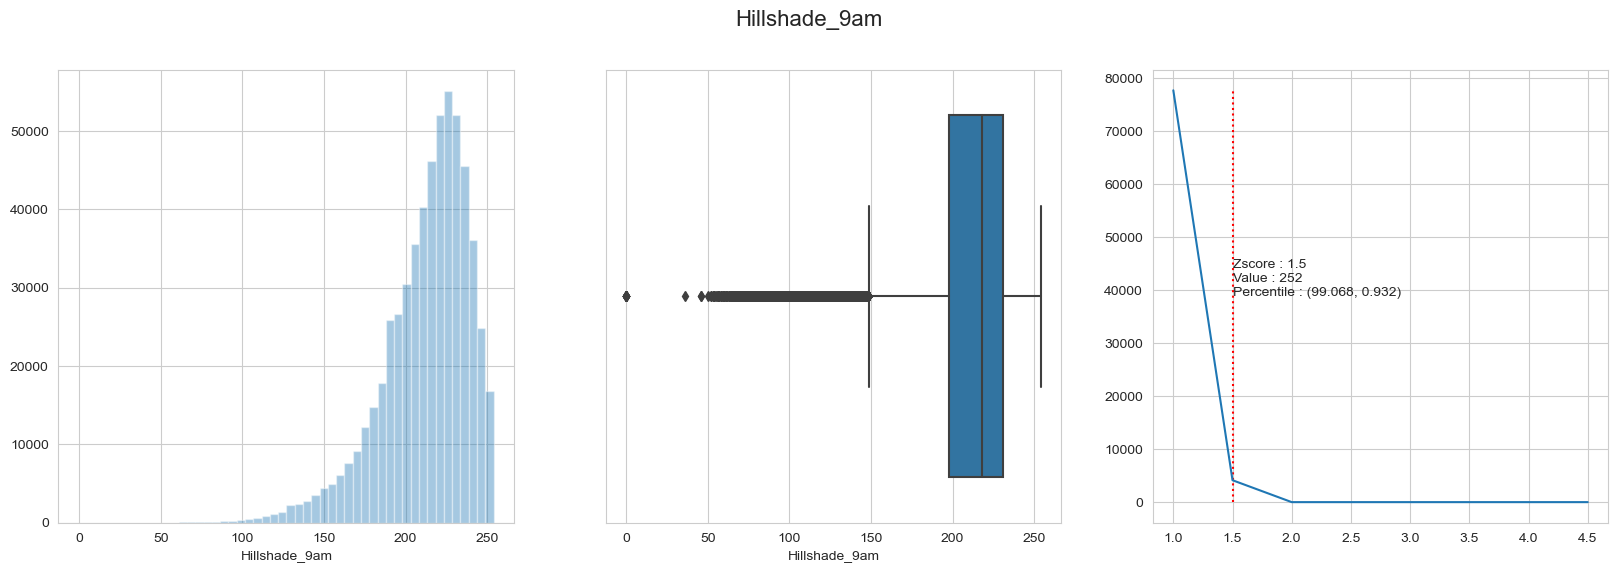

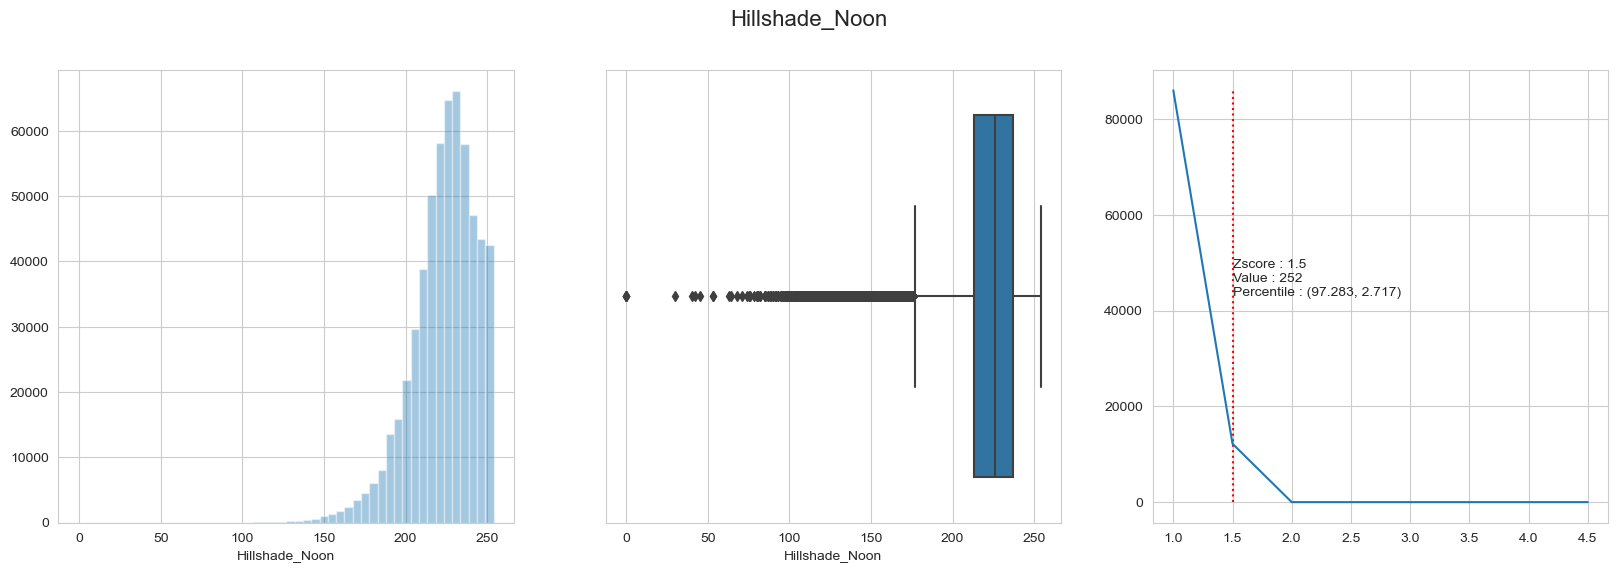

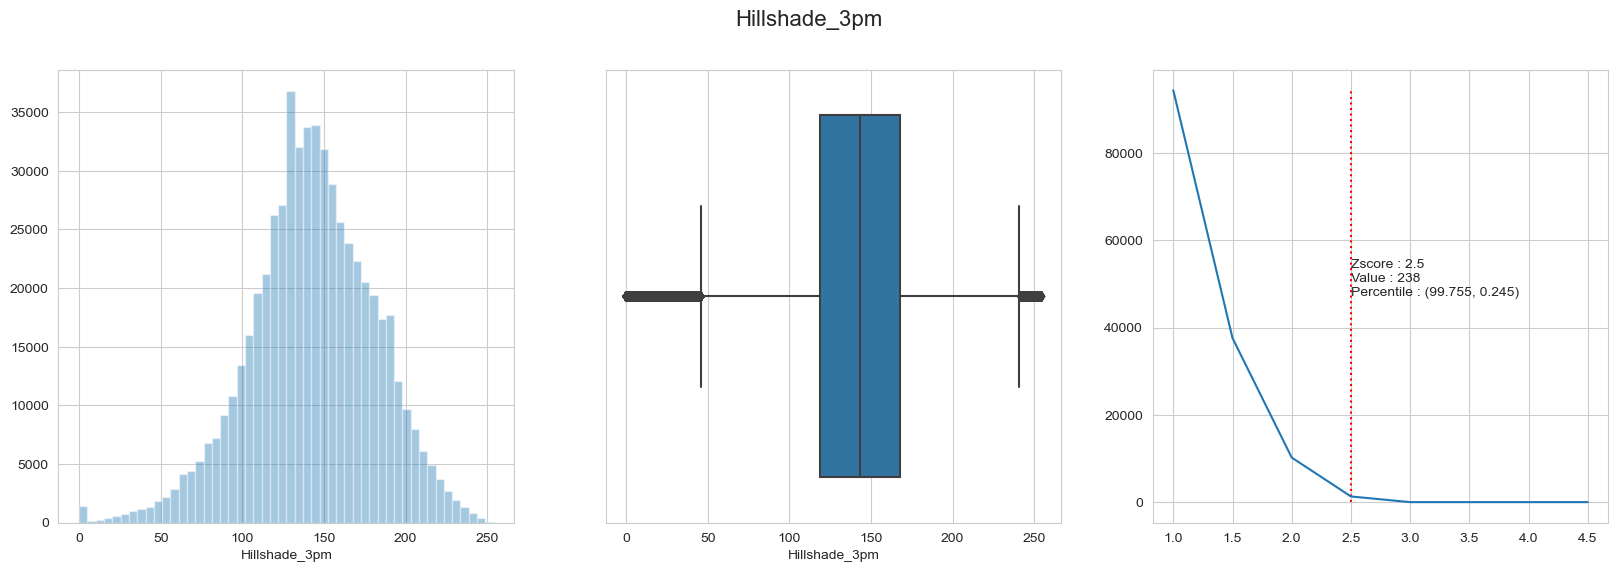

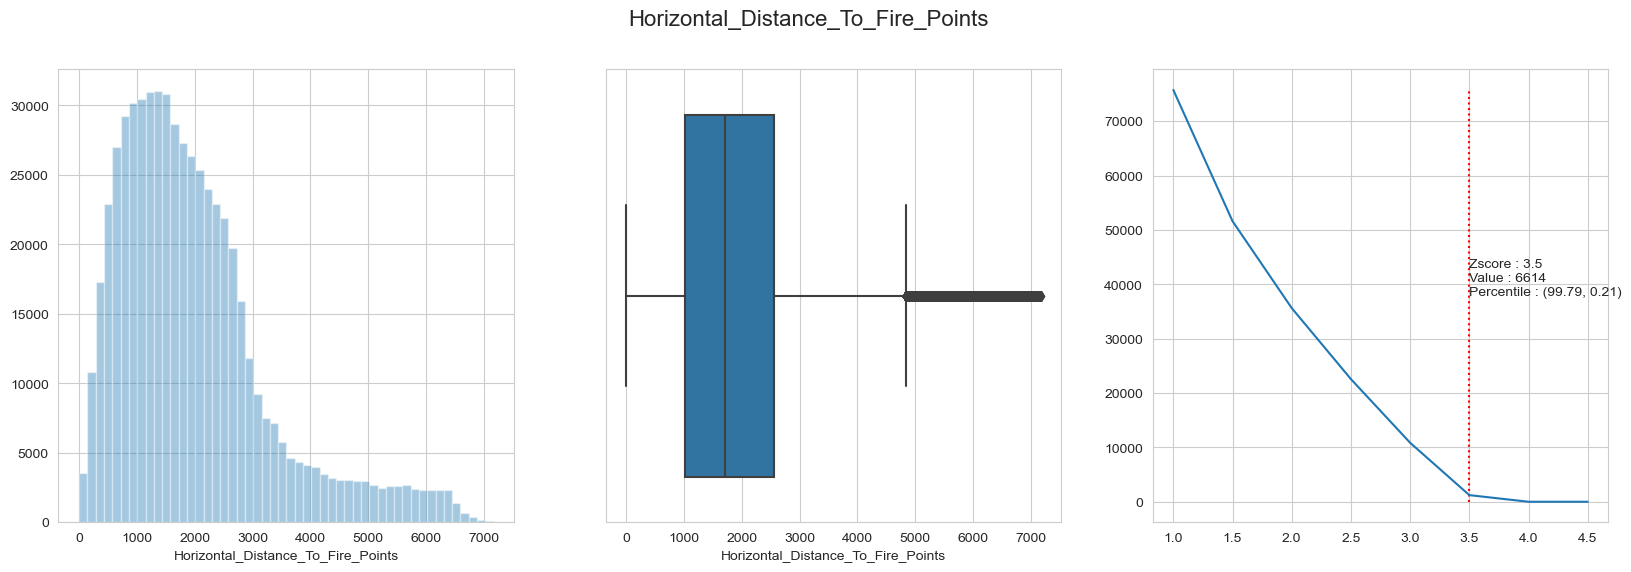

In [32]:
for col in numeric:
    outlier_inspect(df, col)

In [23]:
def detect_outliers(df, col_name):
    '''
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [25]:
for col in numeric:
    if detect_outliers(df, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(df, col)[2], col))

There are 275 outliers in Slope
There are 414 outliers in Horizontal_Distance_To_Hydrology
There are 5339 outliers in Vertical_Distance_To_Hydrology
There are 1027 outliers in Hillshade_9am
There are 1191 outliers in Hillshade_Noon
There are 10 outliers in Horizontal_Distance_To_Fire_Points


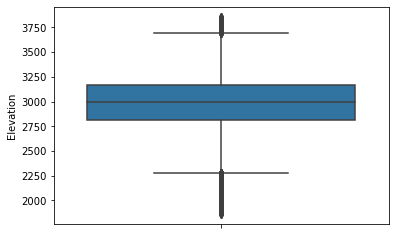

In [4]:
sns.boxplot(y="Elevation",data=df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection in *EDA Project (Outo Scout)* are given below.

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile)

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

#### *ii. Drop Outliers*

You can define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value you choose according to the result from the previous functions.

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [7]:
Q3

Elevation                             3163.0
Aspect                                 260.0
Slope                                   18.0
Horizontal_Distance_To_Hydrology       384.0
Vertical_Distance_To_Hydrology          69.0
Horizontal_Distance_To_Roadways       3328.0
Hillshade_9am                          231.0
Hillshade_Noon                         237.0
Hillshade_3pm                          168.0
Horizontal_Distance_To_Fire_Points    2550.0
Wilderness_Area1                         1.0
Wilderness_Area2                         0.0
Wilderness_Area3                         1.0
Wilderness_Area4                         0.0
Soil_Type1                               0.0
Soil_Type2                               0.0
Soil_Type3                               0.0
Soil_Type4                               0.0
Soil_Type5                               0.0
Soil_Type6                               0.0
Soil_Type7                               0.0
Soil_Type8                               0.0
Soil_Type9

In [8]:
Q3+1.5*IQR

Elevation                             3694.0
Aspect                                 563.0
Slope                                   31.5
Horizontal_Distance_To_Hydrology       798.0
Vertical_Distance_To_Hydrology         162.0
Horizontal_Distance_To_Roadways       6661.0
Hillshade_9am                          280.5
Hillshade_Noon                         273.0
Hillshade_3pm                          241.5
Horizontal_Distance_To_Fire_Points    4839.0
Wilderness_Area1                         2.5
Wilderness_Area2                         0.0
Wilderness_Area3                         2.5
Wilderness_Area4                         0.0
Soil_Type1                               0.0
Soil_Type2                               0.0
Soil_Type3                               0.0
Soil_Type4                               0.0
Soil_Type5                               0.0
Soil_Type6                               0.0
Soil_Type7                               0.0
Soil_Type8                               0.0
Soil_Type9

In [9]:
(Q1-1.5*IQR)

Elevation                             2278.0
Aspect                                -245.0
Slope                                   -4.5
Horizontal_Distance_To_Hydrology      -306.0
Vertical_Distance_To_Hydrology         -86.0
Horizontal_Distance_To_Roadways      -2227.0
Hillshade_9am                          148.5
Hillshade_Noon                         177.0
Hillshade_3pm                           45.5
Horizontal_Distance_To_Fire_Points   -1265.0
Wilderness_Area1                        -1.5
Wilderness_Area2                         0.0
Wilderness_Area3                        -1.5
Wilderness_Area4                         0.0
Soil_Type1                               0.0
Soil_Type2                               0.0
Soil_Type3                               0.0
Soil_Type4                               0.0
Soil_Type5                               0.0
Soil_Type6                               0.0
Soil_Type7                               0.0
Soil_Type8                               0.0
Soil_Type9

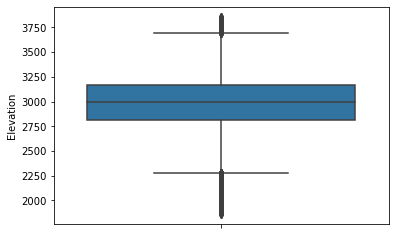

In [10]:
sns.boxplot(y="Elevation",data=df)

In [11]:
df_out1=df[df.Elevation > (Q1 - 1.5 * IQR)['Elevation']]

In [12]:
df_out1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565819 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           565819 non-null  int64
 1   Aspect                              565819 non-null  int64
 2   Slope                               565819 non-null  int64
 3   Horizontal_Distance_To_Hydrology    565819 non-null  int64
 4   Vertical_Distance_To_Hydrology      565819 non-null  int64
 5   Horizontal_Distance_To_Roadways     565819 non-null  int64
 6   Hillshade_9am                       565819 non-null  int64
 7   Hillshade_Noon                      565819 non-null  int64
 8   Hillshade_3pm                       565819 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  565819 non-null  int64
 10  Wilderness_Area1                    565819 non-null  int64
 11  Wilderness_Area2                    565819 non-null 

In [13]:
df_out1=df_out1[df_out1.Elevation < (Q3+ 1.5 * IQR)['Elevation']]

In [14]:
df_out1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565352 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           565352 non-null  int64
 1   Aspect                              565352 non-null  int64
 2   Slope                               565352 non-null  int64
 3   Horizontal_Distance_To_Hydrology    565352 non-null  int64
 4   Vertical_Distance_To_Hydrology      565352 non-null  int64
 5   Horizontal_Distance_To_Roadways     565352 non-null  int64
 6   Hillshade_9am                       565352 non-null  int64
 7   Hillshade_Noon                      565352 non-null  int64
 8   Hillshade_3pm                       565352 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  565352 non-null  int64
 10  Wilderness_Area1                    565352 non-null  int64
 11  Wilderness_Area2                    565352 non-null 

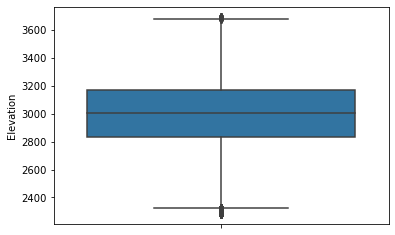

In [15]:
sns.boxplot(y="Elevation",data=df_out1)

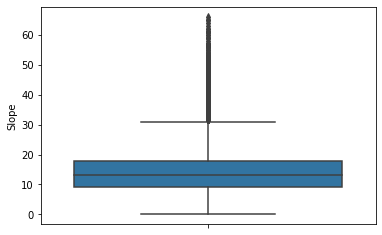

In [16]:
sns.boxplot(y="Slope",data=df_out1)

In [17]:
df_out2=df_out1[df_out1.Slope < (Q3+ 1.5 * IQR)['Slope']]

In [18]:
df_out2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553963 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           553963 non-null  int64
 1   Aspect                              553963 non-null  int64
 2   Slope                               553963 non-null  int64
 3   Horizontal_Distance_To_Hydrology    553963 non-null  int64
 4   Vertical_Distance_To_Hydrology      553963 non-null  int64
 5   Horizontal_Distance_To_Roadways     553963 non-null  int64
 6   Hillshade_9am                       553963 non-null  int64
 7   Hillshade_Noon                      553963 non-null  int64
 8   Hillshade_3pm                       553963 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  553963 non-null  int64
 10  Wilderness_Area1                    553963 non-null  int64
 11  Wilderness_Area2                    553963 non-null 

In [19]:
df_out2=df_out2[df_out2.Slope > (Q1- 1.5 * IQR)['Slope']]



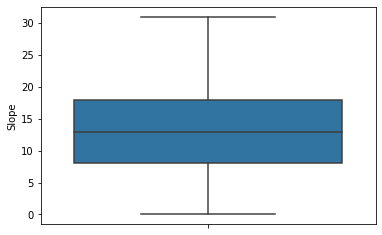

In [20]:
sns.boxplot(y="Slope",data=df_out2)

In [21]:
df_out2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553963 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           553963 non-null  int64
 1   Aspect                              553963 non-null  int64
 2   Slope                               553963 non-null  int64
 3   Horizontal_Distance_To_Hydrology    553963 non-null  int64
 4   Vertical_Distance_To_Hydrology      553963 non-null  int64
 5   Horizontal_Distance_To_Roadways     553963 non-null  int64
 6   Hillshade_9am                       553963 non-null  int64
 7   Hillshade_Noon                      553963 non-null  int64
 8   Hillshade_3pm                       553963 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  553963 non-null  int64
 10  Wilderness_Area1                    553963 non-null  int64
 11  Wilderness_Area2                    553963 non-null 

***
***

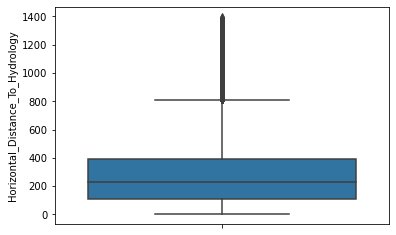

In [22]:
sns.boxplot(y='Horizontal_Distance_To_Hydrology', data=df_out2)

In [23]:
df_out3=df_out2[df_out2.Horizontal_Distance_To_Hydrology < (Q3+ 1.5 * IQR)['Horizontal_Distance_To_Hydrology']]

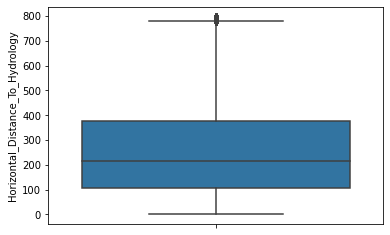

In [24]:
sns.boxplot(y='Horizontal_Distance_To_Hydrology', data=df_out3)

In [25]:
df_out3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539953 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           539953 non-null  int64
 1   Aspect                              539953 non-null  int64
 2   Slope                               539953 non-null  int64
 3   Horizontal_Distance_To_Hydrology    539953 non-null  int64
 4   Vertical_Distance_To_Hydrology      539953 non-null  int64
 5   Horizontal_Distance_To_Roadways     539953 non-null  int64
 6   Hillshade_9am                       539953 non-null  int64
 7   Hillshade_Noon                      539953 non-null  int64
 8   Hillshade_3pm                       539953 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  539953 non-null  int64
 10  Wilderness_Area1                    539953 non-null  int64
 11  Wilderness_Area2                    539953 non-null 

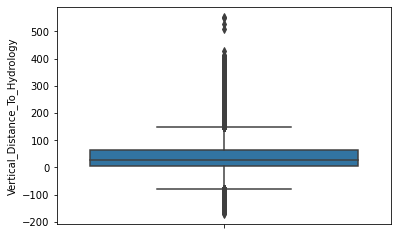

In [26]:
sns.boxplot(y='Vertical_Distance_To_Hydrology', data=df_out3)

In [27]:
df_out4=df_out3[df_out3.Vertical_Distance_To_Hydrology < (Q3+ 1.5 * IQR)['Vertical_Distance_To_Hydrology']]

In [28]:
df_out4=df_out4[df_out4.Vertical_Distance_To_Hydrology > (Q1- 1.5 * IQR)['Vertical_Distance_To_Hydrology']]

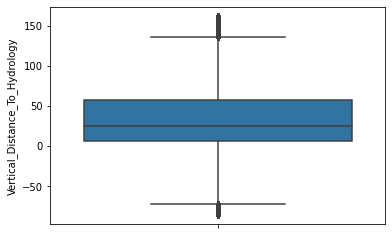

In [29]:
sns.boxplot(y='Vertical_Distance_To_Hydrology', data=df_out4)

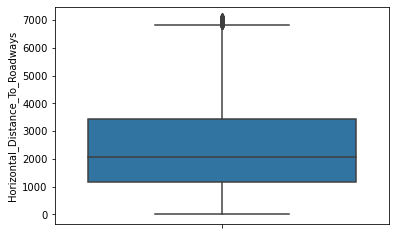

In [30]:
sns.boxplot(y='Horizontal_Distance_To_Roadways', data=df_out4)

In [31]:
df_out5=df_out4[df_out4.Horizontal_Distance_To_Roadways < (Q3+ 1.5 * IQR)['Horizontal_Distance_To_Roadways']]
df_out5=df_out5[df_out5.Horizontal_Distance_To_Roadways > (Q1- 1.5 * IQR)['Horizontal_Distance_To_Roadways']]

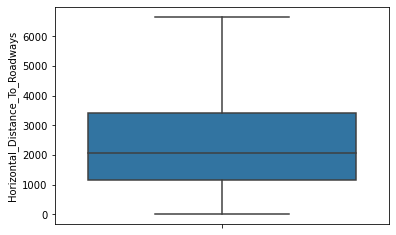

In [32]:
sns.boxplot(y='Horizontal_Distance_To_Roadways', data=df_out5)

cleaned=df_out4[['Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']]

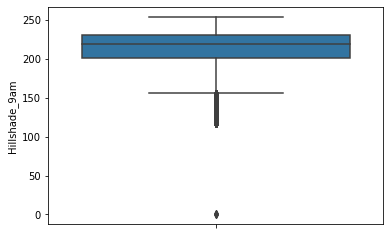

In [33]:
sns.boxplot(y='Hillshade_9am', data=df_out5)

In [34]:
df_out6=df_out5[df_out5.Hillshade_9am < (Q3+ 1.5 * IQR)['Hillshade_9am']]
df_out6=df_out6[df_out6.Hillshade_9am > (Q1- 1.5 * IQR)['Hillshade_9am']]

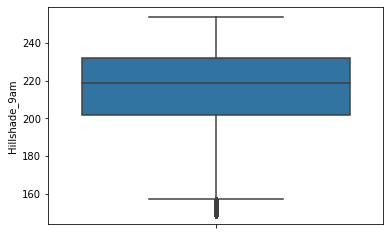

In [35]:
sns.boxplot(y='Hillshade_9am', data=df_out6)

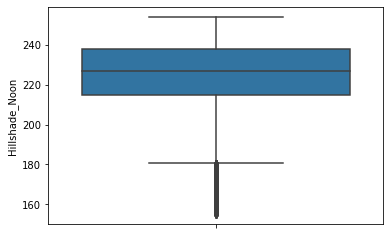

In [36]:
sns.boxplot(y='Hillshade_Noon', data=df_out6)

In [37]:
df_out7=df_out6[df_out6.Hillshade_Noon < (Q3+ 1.5 * IQR)['Hillshade_Noon']]


In [38]:
df_out7=df_out7[df_out7.Hillshade_Noon > (Q1- 1.5 * IQR)['Hillshade_Noon']]

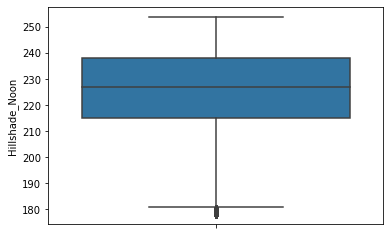

In [39]:
sns.boxplot(y='Hillshade_Noon', data=df_out7)

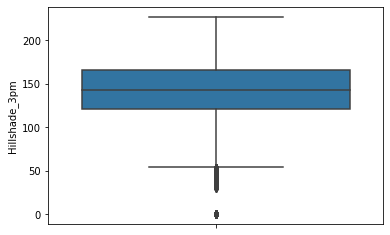

In [40]:
sns.boxplot(y='Hillshade_3pm', data=df_out7)

In [41]:
df_out8=df_out7[df_out7.Hillshade_3pm < (Q3+ 1.5 * IQR)['Hillshade_3pm']]
df_out8=df_out8[df_out8.Hillshade_3pm > (Q1- 1.5 * IQR)['Hillshade_3pm']]

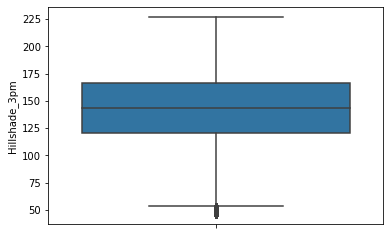

In [42]:
sns.boxplot(y='Hillshade_3pm', data=df_out8)

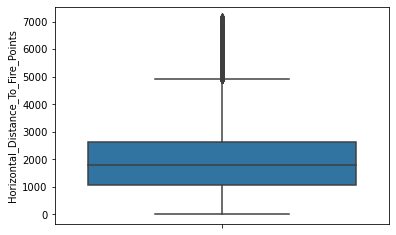

In [43]:
sns.boxplot(y='Horizontal_Distance_To_Fire_Points', data=df_out8)

In [44]:
df_out9=df_out8[df_out8.Horizontal_Distance_To_Fire_Points < (Q3+ 1.5 * IQR)['Horizontal_Distance_To_Fire_Points']]
df_out9=df_out9[df_out9.Horizontal_Distance_To_Fire_Points > (Q1- 1.5 * IQR)['Horizontal_Distance_To_Fire_Points']]

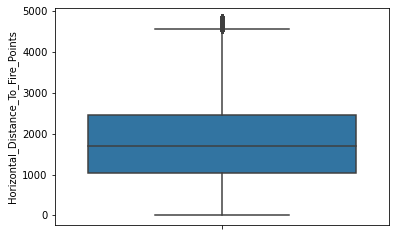

In [45]:
sns.boxplot(y='Horizontal_Distance_To_Fire_Points', data=df_out9)

In [46]:
print(df_out1.shape)
print(df_out2.shape)
print(df_out3.shape)
print(df_out4.shape)
print(df_out5.shape)
print(df_out6.shape)
print(df_out7.shape)
print(df_out8.shape)
print(df_out9.shape)

(565352, 55)
(553963, 55)
(539953, 55)
(518187, 55)
(517514, 55)
(509690, 55)
(502375, 55)
(501195, 55)
(471633, 55)


## 3. Feature Engineering with *sqlite3* Library

Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

In [57]:
import sqlite3

In [58]:
connection = sqlite3.connect("df_out9.db")

In [59]:
print(connection.total_changes)

0


***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [47]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore") 

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [48]:
df_cleaned=df_out9

In [49]:
df_cleaned.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
11,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,0,2
21,2880,209,17,216,30,4986,206,253,179,4323,...,0,0,0,0,0,0,0,0,0,2
27,2962,148,16,323,23,5916,240,236,120,3395,...,0,0,0,0,0,0,0,0,0,2
35,2900,45,19,242,20,5199,221,195,100,4115,...,0,0,0,0,0,0,0,0,0,2
61,2952,107,11,42,7,5845,239,226,116,3509,...,0,0,0,0,0,0,0,0,0,2


In [50]:
X= df_cleaned.drop('Cover_Type',axis=1)

In [65]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
11,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,0,0
21,2880,209,17,216,30,4986,206,253,179,4323,...,0,0,0,0,0,0,0,0,0,0
27,2962,148,16,323,23,5916,240,236,120,3395,...,0,0,0,0,0,0,0,0,0,0
35,2900,45,19,242,20,5199,221,195,100,4115,...,0,0,0,0,0,0,0,0,0,0
61,2952,107,11,42,7,5845,239,226,116,3509,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y = df_cleaned.Cover_Type

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
X_train.shape

(330143, 54)

In [56]:
y_train.shape

(330143,)

In [57]:
df_cleaned.shape

(471633, 55)

In [58]:
X_test.shape

(141490, 54)

In [59]:
y_test.shape

(141490,)

### Implement KNeighborsClassifer

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

In [74]:
from sklearn.neighbors import KNeighborsClassifier

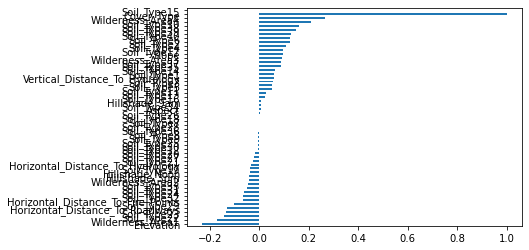

In [75]:
df_cleaned.corr()["Cover_Type"].sort_values().plot.barh()

In [ ]:
X= df_cleaned.drop('Cover_Type',axis=1)
y = df_cleaned.Cover_Type

In [76]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
y_train.shape

(330143,)

In [78]:
a=pd.DataFrame(X_train, columns=X.columns)

In [79]:
a.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-1.157529,-0.728791,-0.467185,0.287609,1.259819,0.029686,0.771396,-0.283150,-0.656054,-0.896672,...,-0.222116,-0.338363,-0.275505,-0.044926,-0.059611,-0.011008,-0.023743,-0.174335,-0.152361,-0.103633
1,-0.059878,-1.017749,1.014988,-0.858320,-0.351951,-1.282462,0.181589,-1.801637,-1.135940,-0.225892,...,-0.222116,-0.338363,3.629697,-0.044926,-0.059611,-0.011008,-0.023743,-0.174335,-0.152361,-0.103633
2,0.745888,-1.108049,-1.455301,-1.026017,-1.031916,0.986340,0.181589,0.263506,0.153755,1.476323,...,-0.222116,-0.338363,-0.275505,-0.044926,-0.059611,-0.011008,-0.023743,-0.174335,-0.152361,-0.103633
3,-1.420636,1.104291,-0.137813,0.220531,-0.351951,-1.178478,-1.270244,1.053119,1.563421,-0.651942,...,-0.222116,-0.338363,-0.275505,-0.044926,-0.059611,-0.011008,-0.023743,-0.174335,-0.152361,-0.103633
4,-0.232542,-1.162229,-0.302499,-0.288150,-0.125296,-0.617614,0.000110,-0.586847,-0.176167,-1.096816,...,4.502151,-0.338363,-0.275505,-0.044926,-0.059611,-0.011008,-0.023743,-0.174335,-0.152361,-0.103633


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
knn_model=KNeighborsClassifier().fit(X_train, y_train)

In [ ]:
y_pred=knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,y_test)

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC()

In [ ]:
svc_model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,y_test)

### Compare The Models

So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___